## Лаб.02

### Инструментарий анализа качества работы ИНС

---

#### Задание:
Познакомиться с простейшими приемами анализа качества работы ИНС на примере задачи распознавания предметов одежды (рассмотрена в предыдущем задании).

**Порядок выполнения работы:**
1.	Подготовьте обучающие и тестовые данные; создайте и подготовьте к работе ИНС с архитектурой, аналогичной построенной при выполнении лабораторной работы 1.
2.	Выполните обучение ИНС с использованием проверочного набора данных; результаты обучения сохраните в переменной history.
3.	Изучите атрибут history объекта, сохраненного в п. 2. Выведите тип, структуру (ключи) и значения.
4.	Выведите на одном графике значения метрики качества модели на обучающих данных и проверочном наборе в зависимости от эпохи обучения:<br><img src="lab_02_img_01.jpg"><br>
5.	Проанализируйте историю обучения по эпохам. Сделайте выводы.
6.	Постарайтесь улучшить модель путем изменения гиперпараметров:
    * количество нейронов в полносвязном слое: 400, 600, 800, 1200;
    * добавьте в ИНС один или несколько скрытых слоев с количеством нейронов 200, 300, 400, 600, 800;
    * используйте разное количество эпох (ориентируясь на результаты процесса обучения);
    * используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
7.	Проверьте качество лучшей из полученных моделей на тестовых данных.
8.	Сохраните лучшую модель в файле.

---

1.	Подготовьте обучающие и тестовые данные; создайте и подготовьте к работе ИНС с архитектурой, аналогичной построенной при выполнении лабораторной работы 1.

In [ ]:
import matplotlib.pyplot as plt
from keras import Sequential, layers
from tensorflow.keras.datasets import mnist

In [ ]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
images.shape

(60000, 784)

In [ ]:
labels.shape

(60000,)

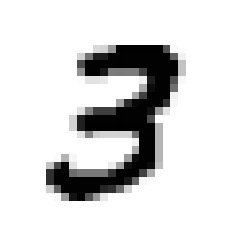

In [ ]:
some_digit = images[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
labels[7]

3

In [ ]:
train_labels.shape

(50000,)

---

2.	Выполните обучение ИНС с использованием проверочного набора данных; результаты обучения сохраните в переменной history.

In [ ]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# perform ANN training using the validation dataset; save the learning results in the history variable

history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 0.2819 - accuracy: 0.9189 - val_loss: 0.1547 - val_accuracy: 0.9540
Epoch 2/5
391/391 [==============================] - 4s 11ms/step - loss: 0.1146 - accuracy: 0.9669 - val_loss: 0.0971 - val_accuracy: 0.9724
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0997 - val_accuracy: 0.9713
Epoch 4/5
391/391 [==============================] - 4s 11ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 5/5
391/391 [==============================] - 5s 12ms/step - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0859 - val_accuracy: 0.9741


---

3.	Изучите атрибут history объекта, сохраненного в п. 2. Выведите тип, структуру (ключи) и значения.

In [ ]:
history

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


4.	Выведите на одном графике значения метрики качества модели на обучающих данных и проверочном наборе в зависимости от эпохи обучения:<br><img src="lab_02_img_01.jpg"><br>

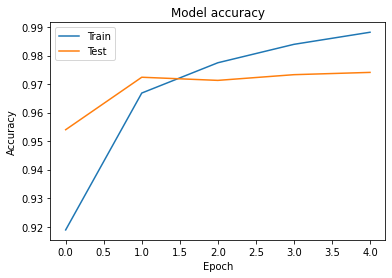

In [ ]:
# plot the learning results

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

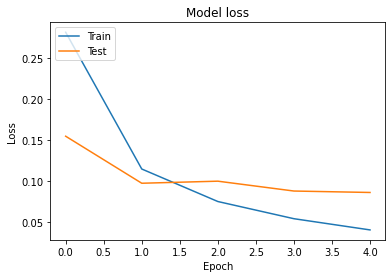

In [ ]:
# plot the values of the model quality metric on the training data and the test set depending on the training epoch on the same graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

---

5.	Проанализируйте историю обучения по эпохам. Сделайте выводы.

In [ ]:
# code

---

6.	Постарайтесь улучшить модель путем изменения гиперпараметров:
    * количество нейронов в полносвязном слое: 400, 600, 800, 1200;
    * добавьте в ИНС один или несколько скрытых слоев с количеством нейронов 200, 300, 400, 600, 800;
    * используйте разное количество эпох (ориентируясь на результаты процесса обучения);
    * используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.

In [ ]:
def ann_model(neurons):
    model = Sequential()
    model.add(layers.Dense(neurons, input_shape=(28 * 28,)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(800, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

In [ ]:
def fit_model(epochs, batch_sizes):
    for epoch in epochs:
        for batch_size in batch_sizes:
            history = model.fit(train_images, train_labels, epochs=epoch, batch_size=batch_size,
                                validation_data=(val_images, val_labels))

            # plot the learning results
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'], loc='upper left')
            plt.show()

            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'], loc='upper left')
            plt.show()
    return

Epoch 1/50
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0683 - accuracy: 0.9806 - val_loss: 0.1170 - val_accuracy: 0.9751
Epoch 2/50
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0641 - accuracy: 0.9842 - val_loss: 0.1210 - val_accuracy: 0.9780
Epoch 3/50
5000/5000 [==============================] - 34s 7ms/step - loss: 0.0572 - accuracy: 0.9875 - val_loss: 0.1350 - val_accuracy: 0.9774
Epoch 4/50
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0484 - accuracy: 0.9897 - val_loss: 0.1375 - val_accuracy: 0.9781
Epoch 5/50
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0438 - accuracy: 0.9908 - val_loss: 0.1361 - val_accuracy: 0.9776
Epoch 6/50
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0383 - accuracy: 0.9925 - val_loss: 0.1635 - val_accuracy: 0.9774
Epoch 7/50
5000/5000 [==============================] - 36s 7ms/step - loss: 0.0325 - accuracy: 0.9928 - val_loss: 0.2168 - val_ac

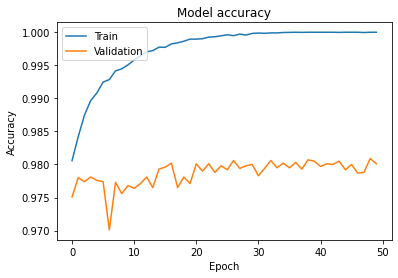

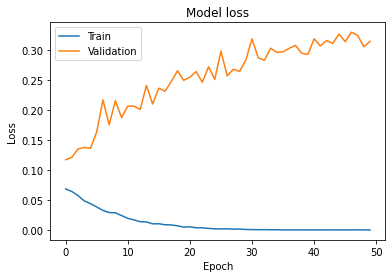

Epoch 1/50
1000/1000 [==============================] - 10s 10ms/step - loss: 1.9526e-09 - accuracy: 1.0000 - val_loss: 0.3127 - val_accuracy: 0.9804
Epoch 2/50
1000/1000 [==============================] - 10s 10ms/step - loss: 4.4823e-10 - accuracy: 1.0000 - val_loss: 0.3111 - val_accuracy: 0.9807
Epoch 3/50
1000/1000 [==============================] - 9s 9ms/step - loss: 3.8385e-10 - accuracy: 1.0000 - val_loss: 0.3126 - val_accuracy: 0.9805
Epoch 4/50
1000/1000 [==============================] - 9s 9ms/step - loss: 3.5524e-10 - accuracy: 1.0000 - val_loss: 0.3145 - val_accuracy: 0.9807
Epoch 5/50
1000/1000 [==============================] - 9s 9ms/step - loss: 3.7432e-10 - accuracy: 1.0000 - val_loss: 0.3155 - val_accuracy: 0.9807
Epoch 6/50
1000/1000 [==============================] - 9s 9ms/step - loss: 4.1485e-10 - accuracy: 1.0000 - val_loss: 0.3167 - val_accuracy: 0.9807
Epoch 7/50
1000/1000 [==============================] - 9s 9ms/step - loss: 4.3869e-10 - accuracy: 1.0000 - 

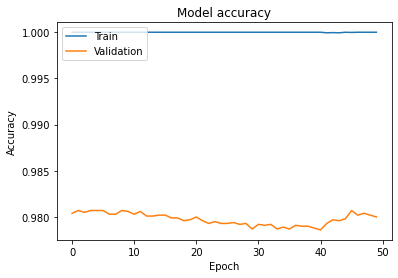

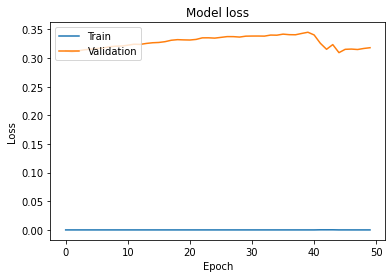

Epoch 1/50
500/500 [==============================] - 5s 11ms/step - loss: 3.8624e-10 - accuracy: 1.0000 - val_loss: 0.3188 - val_accuracy: 0.9801
Epoch 2/50
500/500 [==============================] - 6s 11ms/step - loss: 4.2200e-10 - accuracy: 1.0000 - val_loss: 0.3193 - val_accuracy: 0.9801
Epoch 3/50
500/500 [==============================] - 6s 11ms/step - loss: 4.1246e-10 - accuracy: 1.0000 - val_loss: 0.3201 - val_accuracy: 0.9801
Epoch 4/50
500/500 [==============================] - 5s 11ms/step - loss: 4.5538e-10 - accuracy: 1.0000 - val_loss: 0.3210 - val_accuracy: 0.9801
Epoch 5/50
500/500 [==============================] - 6s 11ms/step - loss: 4.7684e-10 - accuracy: 1.0000 - val_loss: 0.3210 - val_accuracy: 0.9801
Epoch 6/50
500/500 [==============================] - 6s 11ms/step - loss: 5.1737e-10 - accuracy: 1.0000 - val_loss: 0.3222 - val_accuracy: 0.9803
Epoch 7/50
500/500 [==============================] - 6s 11ms/step - loss: 5.2214e-10 - accuracy: 1.0000 - val_loss: 0

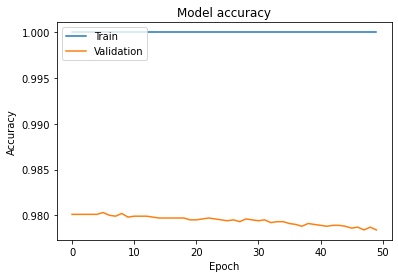

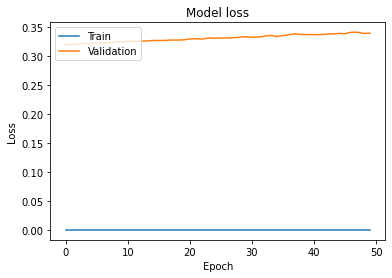

Epoch 1/50
250/250 [==============================] - 4s 15ms/step - loss: 2.1791e-09 - accuracy: 1.0000 - val_loss: 0.3400 - val_accuracy: 0.9784
Epoch 2/50
250/250 [==============================] - 4s 15ms/step - loss: 2.2316e-09 - accuracy: 1.0000 - val_loss: 0.3410 - val_accuracy: 0.9784
Epoch 3/50
250/250 [==============================] - 4s 15ms/step - loss: 2.3174e-09 - accuracy: 1.0000 - val_loss: 0.3413 - val_accuracy: 0.9784
Epoch 4/50
250/250 [==============================] - 4s 16ms/step - loss: 2.3866e-09 - accuracy: 1.0000 - val_loss: 0.3413 - val_accuracy: 0.9783
Epoch 5/50
250/250 [==============================] - 5s 18ms/step - loss: 2.3055e-09 - accuracy: 1.0000 - val_loss: 0.3416 - val_accuracy: 0.9784
Epoch 6/50
250/250 [==============================] - 4s 15ms/step - loss: 2.4867e-09 - accuracy: 1.0000 - val_loss: 0.3417 - val_accuracy: 0.9782
Epoch 7/50
250/250 [==============================] - 4s 15ms/step - loss: 2.4581e-09 - accuracy: 1.0000 - val_loss: 0

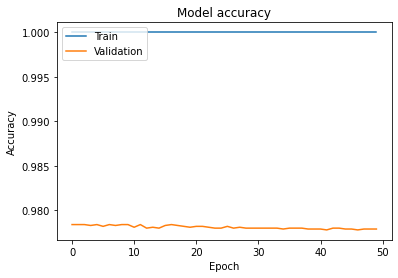

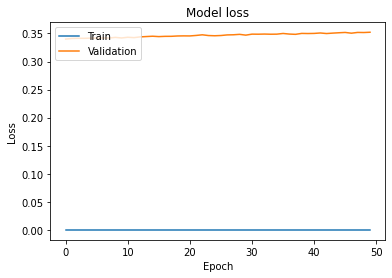

Epoch 1/50
100/100 [==============================] - 3s 31ms/step - loss: 3.1996e-09 - accuracy: 1.0000 - val_loss: 0.3515 - val_accuracy: 0.9780
Epoch 2/50
100/100 [==============================] - 3s 33ms/step - loss: 3.2115e-09 - accuracy: 1.0000 - val_loss: 0.3513 - val_accuracy: 0.9778
Epoch 3/50
100/100 [==============================] - 3s 26ms/step - loss: 3.2258e-09 - accuracy: 1.0000 - val_loss: 0.3522 - val_accuracy: 0.9779
Epoch 4/50
100/100 [==============================] - 3s 26ms/step - loss: 3.2830e-09 - accuracy: 1.0000 - val_loss: 0.3520 - val_accuracy: 0.9779
Epoch 5/50
100/100 [==============================] - 3s 26ms/step - loss: 3.2878e-09 - accuracy: 1.0000 - val_loss: 0.3517 - val_accuracy: 0.9779
Epoch 6/50
100/100 [==============================] - 3s 26ms/step - loss: 3.2830e-09 - accuracy: 1.0000 - val_loss: 0.3523 - val_accuracy: 0.9779
Epoch 7/50
100/100 [==============================] - 3s 26ms/step - loss: 3.2425e-09 - accuracy: 1.0000 - val_loss: 0

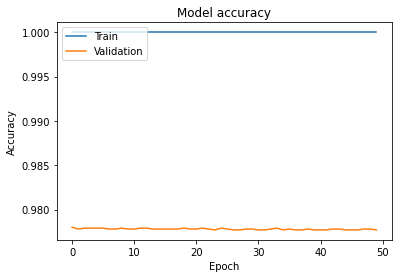

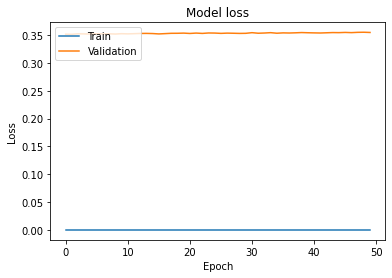

In [ ]:
# perform ANN training using the validation dataset; save the learning results in the history variable
epochs = [50]
batchs = [10, 50, 100, 200, 500]
fit_model(epochs, batchs)

---

7.	Проверьте качество лучшей из полученных моделей на тестовых данных.

In [ ]:
# code

---

8.	Сохраните лучшую модель в файле.

In [ ]:
model.save('model_lab_2')

In [ ]:
from google.colab import files
files.download('model_lab_2')